# Implementing Linear Regression

## Import

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the data

In [4]:
bos = load_boston()

print(bos.DESCR)
print(bos.feature_names)
print(bos.target)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Converting Data to Pandas

In [19]:
df = pd.DataFrame(bos.data,columns = list(bos.feature_names))
y = bos.target
df.head().transpose()

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


### Standardizing the data

In [26]:
std = StandardScaler()
df = std.fit_transform(df)

## Splitting the data

In [27]:
xtrain , xtest , ytrain , ytest = train_test_split(df,y,test_size=0.1)

## Implementing Linear Regression

In [28]:
model = LinearRegression(n_jobs=-1)
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [29]:
model.score(xtest , ytest)

0.8059033640185772

In [31]:
yprediction = model.predict(xtest)

### Plotting Predcition

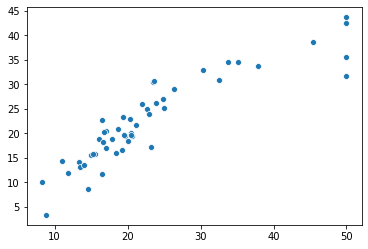

In [34]:
plt.figure()
sns.scatterplot(x=ytest,y=yprediction)
plt.show()

### Plotting Error

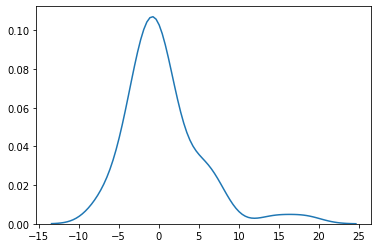

In [35]:
deltay = ytest - yprediction
plt.figure()
sns.kdeplot(deltay)
plt.show()

### Predciction VS Actual

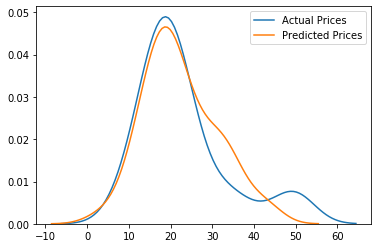

In [40]:
plt.figure()
sns.kdeplot(ytest,label='Actual Prices')
sns.kdeplot(yprediction,label='Predicted Prices')
plt.legend()
plt.show()